In [8]:
import pandas as pd
import numpy as np
import os
import PIL
from keras.preprocessing.image import load_img,img_to_array
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.model_selection import train_test_split
#conda install -c anaconda keras


In [9]:
import os

hot_dog_image_dir = 'train/hot_dog/'
hot_dog_paths = [''.join(hot_dog_image_dir+filename) for filename in 
                            os.listdir(hot_dog_image_dir)]

not_hot_dog_image_dir = 'train/not_hot_dog/'
not_hot_dog_paths = [''.join(not_hot_dog_image_dir+filename) for filename in
                            os.listdir(not_hot_dog_image_dir)]

image_paths_train = hot_dog_paths + not_hot_dog_paths
y_dog=np.ones((len(hot_dog_paths),1),dtype=int)
y_not=np.zeros((len(not_hot_dog_paths),1),dtype=int)
y_train=np.concatenate((y_dog, y_not), axis=0)
# print(image_paths_train)
# print(y_train)

###############################################################################################################
hot_dog_image_dir_test = 'test/hot_dog/'
hot_dog_paths_test = [''.join(hot_dog_image_dir_test+filename) for filename in 
                            os.listdir(hot_dog_image_dir_test)]

not_hot_dog_image_dir_test = 'test/not_hot_dog/'
not_hot_dog_paths_test = [''.join(not_hot_dog_image_dir_test+filename) for filename in
                            os.listdir(not_hot_dog_image_dir_test)]

image_paths_test = hot_dog_paths_test + not_hot_dog_paths_test
y_dog_test=np.ones((len(hot_dog_paths_test),1),dtype=int)
y_dog_not=np.zeros((len(not_hot_dog_paths_test),1),dtype=int)
y_test=np.concatenate((y_dog_test, y_dog_not), axis=0)
# print(image_paths_test)
# print(y_test)
# print(y_test.shape)

In [10]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.val_acc = []
        self.acc = []
        
    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        self.val_acc.append(logs.get('val_acc'))
        self.acc.append(logs.get('acc'))

history_cb = LossHistory()

In [11]:
def loadpath(image_paths,xsize=16,ysize=16):
    X=[]
    for location in image_paths:
        img=load_img(location,target_size=(xsize,ysize))
        sx=img_to_array(img) #(512, 382, 3)
#         print(x.shape)
#         sx=sx.reshape((1,)+sx.shape) #(1, 512, 382, 3)
#         print(sx.shape)
#         print(sx)
        X.append(sx)
        input_shape=sx.shape   
    return input_shape,np.array(X)

In [5]:
# from keras.preprocessing.image import ImageDataGenerator

# def weirdfilters(x,num_gen,ImageDataGenerator(
#             rotation_range=40,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             rescale=1./255,
#             shear_range=0.2,
#             zoom_range=0.2,
#             horizontal_flip=True,
#             fill_mode='nearest')
                 
                 
#     datagen = ImageDataGenerator(
#             rotation_range=40,
#             width_shift_range=0.2,
#             height_shift_range=0.2,
#             rescale=1./255,
#             shear_range=0.2,
#             zoom_range=0.2,
#             horizontal_flip=True,
#             fill_mode='nearest')
#     count=0
#     while(count!=x):
#         count+=1
#         datagen.flow(x,batch_size=1,save_to_dir'preview',save_prefix='cat',save_format='jpeg')
        
    
        
#     return datagen

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [8]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,128,128)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 128, 128, 3)
(200, 128, 128, 3)
(798, 1)
(200, 1)


In [6]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# Basic model1

M1 = Sequential()

M1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

M1.add(Conv2D(64, (3, 3), activation='relu'))

M1.add(MaxPooling2D(pool_size=(3, 3)))

M1.add(Flatten())

M1.add(Dense(128, activation='relu'))

M1.add(Dense(1, activation='sigmoid'))

M1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 107584)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               13770880  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 13,790,401
Trainable params: 13,790,401
Non-trainable params: 0
________________________________________________________________

In [8]:
import keras
batch_size=256
epochs=100
M1.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adadelta(lr=0.01),metrics=['accuracy'])

M1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb])

score = M1.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 798 samples, validate on 200 samples
Epoch 1/100
798/798 [==============================] - 33s 42ms/step - loss: 0.4936 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 2/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4935 - acc: 0.5063 - val_loss: 0.4767 - val_acc: 0.4800
Epoch 3/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4935 - acc: 0.4862 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 4/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 5/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 6/100
798/798 [==============================] - 35s 44ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 7/100
798/798 [==============================] - 35s 44ms/step - loss: 0.4937 - acc: 0.5063 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 8/1

Epoch 61/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 62/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 63/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 64/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 65/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 66/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 67/100
798/798 [==============================] - 33s 41ms/step - loss: 0.4925 - acc: 0.5075 - val_loss: 0.5250 - val_acc: 0.4750
Epoch 68/100
798/798 [==========================

In [10]:
M1.save('Skynet_M1')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

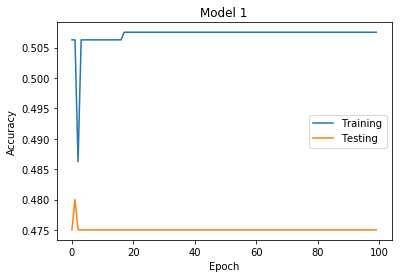

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

model1Hist = history_cb
plt.plot(model1Hist.acc)
plt.plot(model1Hist.val_acc)
plt.title('Model 1')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [13]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,200,200)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 200, 200, 3)
(100, 200, 200, 3)
(898, 1)
(100, 1)
(200, 200, 3)


In [14]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# Basic model1

M2 = Sequential()

M2.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),activation='relu',input_shape=input_shape))
M2.add(Conv2D(32, (3, 3), activation='relu'))

M2.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M2.add(Conv2D(64, (3, 3), activation='relu'))
M2.add(Conv2D(64, (3, 3), activation='relu'))

M2.add(MaxPooling2D(pool_size=(4, 4)))

M2.add(Conv2D(128, (4, 4), activation='relu'))
M2.add(Conv2D(128, (4, 4), activation='relu'))

M2.add(MaxPooling2D(pool_size=(5, 5)))

M2.add(Flatten())

M2.add(Dense(2100,activation='relu'))

M2.add(Dense(1420,activation='relu'))

M2.add(Dense(128, activation='relu'))

M2.add(Dense(1, activation='sigmoid'))

M2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 95, 95, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 93, 93, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 128)       131200    
__________

In [15]:
import keras

history_cb1 = LossHistory()

batch_size=256
epochs=100
M2.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adadelta(lr=0.01),metrics=['accuracy'])

M2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb1])

score = M2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 116s 130ms/step - loss: 1.0459 - acc: 0.5022 - val_loss: 1.0255 - val_acc: 0.4800
Epoch 2/100
898/898 [==============================] - 120s 133ms/step - loss: 1.0533 - acc: 0.4944 - val_loss: 0.8689 - val_acc: 0.5000
Epoch 3/100
898/898 [==============================] - 119s 132ms/step - loss: 0.9074 - acc: 0.5100 - val_loss: 0.7746 - val_acc: 0.5300
Epoch 4/100
898/898 [==============================] - 118s 132ms/step - loss: 0.7828 - acc: 0.5256 - val_loss: 0.9822 - val_acc: 0.4700
Epoch 5/100
898/898 [==============================] - 118s 131ms/step - loss: 0.8719 - acc: 0.4900 - val_loss: 0.9678 - val_acc: 0.4700
Epoch 6/100
898/898 [==============================] - 108s 120ms/step - loss: 0.8742 - acc: 0.4967 - val_loss: 0.8621 - val_acc: 0.4800
Epoch 7/100
898/898 [==============================] - 108s 121ms/step - loss: 0.7640 - acc: 0.5223 - val_loss: 0.7348 - val_acc: 0.

In [17]:
M2.save('Skynet_M2')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

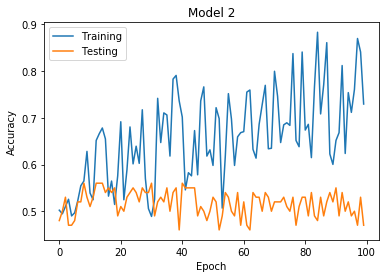

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

model2Hist = history_cb1
plt.plot(model2Hist.acc)
plt.plot(model2Hist.val_acc)
plt.title('Model 2')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

In [6]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,200,200)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 200, 200, 3)
(100, 200, 200, 3)
(898, 1)
(100, 1)
(200, 200, 3)


In [16]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M3 = Sequential()

M3.add(Conv2D(32, kernel_size=(3, 3),strides=(1,1),activation='relu',input_shape=input_shape))
M3.add(Conv2D(64, (3, 3), activation='relu'))

M3.add(BatchNormalization())

M3.add(Dropout(.2))

M3.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M3.add(Conv2D(64, (3, 3), activation='relu'))
M3.add(Conv2D(128, (3, 3), activation='relu'))

M3.add(Dropout(.2))

M3.add(BatchNormalization())

M3.add(MaxPooling2D(pool_size=(4, 4)))

M3.add(Conv2D(128, (4, 4), activation='relu'))
M3.add(Conv2D(128, (4, 4), activation='relu'))

M3.add(BatchNormalization())

M3.add(Dropout(.2))

M3.add(MaxPooling2D(pool_size=(4, 4)))

M3.add(Flatten())

M3.add(Dense(2100,activation='relu'))

M3.add(Dense(720,activation='relu'))

M3.add(Dense(1, activation='sigmoid'))

M3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 196, 196, 64)      18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 196, 196, 64)      256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 196, 196, 64)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 97, 97, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 95, 95, 64)        36928     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 93, 93, 128)       73856     
__________

In [7]:
#        ,@@@@@@@@@@,,@@@@@@@%  .#&@@@&&.,@@@@@@@@@@,      %@@@@@@%*   ,@@@%     .#&@@@&&.  *&@@@@&(  ,@@@@@@@%  %@@@@@,     ,@@,          
            ,@@,    ,@@,      ,@@/   ./.    ,@@,          %@%   ,&@# .&@&@@(   .@@/   ./. #@&.  .,/  ,@@,       %@%  *&@&.  ,@@,          
            ,@@,    ,@@&%%%%. .&@@/,        ,@@,          %@%   ,&@# %@& /@@,  .&@@/,     (@@&%(*.   ,@@&%%%%.  %@%    &@#  ,@@,          
            ,@@,    ,@@/,,,,    ./#&@@@(    ,@@,          %@@@@@@%* /@@,  #@&.   ./#&@@@(   *(%&@@&. ,@@/,,,,   %@%    &@#  .&&.          
            ,@@,    ,@@,      ./,   .&@#    ,@@,          %@%      ,@@@@@@@@@% ./.   .&@# /*.   /@@. ,@@,       %@%  *&@&.   ,,           
            ,@@,    ,@@@@@@@% .#&@@@@&/     ,@@,          %@%     .&@#     ,@@/.#&@@@@&/   /%&@@@@.  ,@@@@@@@%  %@@@@@.     ,@@,          
,*************,,*/(((((//,,*(#%%%%%%%%%%%%%%%#(*,,,****************************************************,*/(((((((((/((((////****/((##%%%%%%
,*************,,//((((((//,,*(%%%%%%%%%%%%%%%%%##/*****************************************************,,*/(///(//////****//((##%%%%%%%%%%%
,************,,*/(((((((//***/#%%%%%%%%%%%%%%%%%%%#(/***************************************************,*//////////*//((#%%%%%%%%%%%%%%%%%
,***********,,*////////////***/##%%%%%%%%%%%%%%%%%%%##(*,***********************************************,,*////////(###%%%%%%%%%%%%%%%%%%%%
,**********,,,*/*******//////**/(#%%%%%%%%%%%%%%%%%%%%%#(/**********************************************,,,***/(##%%%%%%%%%%%%%%%%%%%%%%%%%
,*********,,,,*************///***/(#%%%%%%%%%%%%%%%%%%%%%%#(/***********************************,****,****/((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
,*********,,,***************//****/(##%%%%%%%%%%%%%%%%%%%%%%##//**************//////////////////////((#####%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(
,********,,,,***********************/(#%%%%%%%%%%%%%%%%%%%%%%%##################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/
,*******,..,***********************,,*/##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###((//
,*******,.,,***********************,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(//**//
,******,.,,,************************,,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//*******
,*****,,,,,********,***,,,,,,,,,,,,*,,,,,,*/(######%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(/**********
,*****,..,*******,,,,,,,,,,,,,,,,,,,,,,*,,,,*///((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###(/************
,*****,,,*******,,,,,*,,,,,,,,,,,,,,,,,****,,,*/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#######(//**************
,****,.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,**,,,/(%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#((//******************
,***,..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..,,,,,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******************
,**,,.,,,,,,,,,,,,,,,,,,,,,,,,,,.......,,,,,,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#####%%%%%%%%%%%%%%%%#(/******************
,**,..,,,,,,,,,,,,,,,,,,,,,,,,,......,,,*,,,*(#%%%%%%%%##(((/(##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(((/*/((#%%%%%%%%%%%%%%#(/*****************
,*,..,,,,,,,,,,,,,,,,,,,,,,,,,,,.....,,**,,*/#%%%%%%%##((((*,**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((##/,,,*(#%%%%%%%%%%%%%%#(*****************
.*,.,,,**,,,,,,,,,,,,,,,,,,,,,,,,,,*****,,,/(%%%%%%%%#(//(#/,..*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(//(#/,..,/(#%%%%%%%%%%%%%%#/*****///////////
.,..,,,,,,,,,,,,,,,,,,,,,,,,,,*,,*******,,,(#%%%%%%%%#(*,,,....,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%#(*,,,....,/(#%%%%%%%%%%%%%%#(*,**////////////
.,..,,,,,,,,,...........,,,,,,*,********,,*(#%%%%%%%%%#(/*,,...,/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,..,*/##%%%%%%%%%%%%%%%#(***////////////
...,,,,,,,................,,*,**********,,/#%%%%%%%%%%%%#((////((#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##((///(#%%%%%%%%%%%%%%%%%%(/**////////////
 ..,,,,,,.................,,,**********,,*(#%%%%%%%%%%%%%%%%%%#%%%%%%%%#((///((#%%%%%%%%%%%%%%%%%%%%%#%%%%%%%%%%%%%%%%%%%%%#/**////////////
.,,,,,,,,.................,,***********,,/(####%%%%%%%%%%%%%%%%%%%%%%%%#(/*,,,*(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*////////////
.,***,,,,,,..............,,,**********,..,***//((##%%%%%%%%%%%%%%%%%%%%%%%##((##%%%%%%%%%%%%%%%%%%%%%%%%%##(((((((((###%%%%%#/**///////////
.*****,,,,,,,,,,,,,,,,,,,*************,..,*******/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##///*//////((#%%%%%#(**///////////
.****************/******/***////*****,.,*///////**/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(////////////(#%%%%%#/**//////////
.***********************/////*******,..,*//////////(#%%%%%%%%%%%%%%%%%%%%##########%%%%%%%%%%%%%%%%%%%%#(///////////*/(#%%%%%#(***/////////
.************************///********,..,*//////////#%%%%%%%%%%%%%%%%%%#(//*****///(((##%%%%%%%%%%%%%%%%#(///////////**/##%%%%##/***////////
.***********************************,.,,***///////(#%%%%%%%%%%%%%%%%#(/*,,,*//((((////(#%%%%%%%%%%%%%%%#((////////////(#%%%%%%#(*********//
,***********,,,*,,*,,**************,,,*//******//(#%%%%%%%%%%%%%%%%%#(*,,*/(((#####(((((#%%%%%%%%%%%%%%%##///////////(#%%%%%%%%#(***///////
,*************,,**,,,************,,,,,/(##((((####%%%%%%%%%%%%%%%%%%%(/**/(((#((((#((//(#%%%%%%%%%%%%%%%%%#(((((((((##%%%%%%%%%%#/**///////
,******************************,,,,,,,*(#%#%%%%%%%%%%%%%%%%%%%%%%%%%%#(**/((#(#(((#((//(#%%%%%%%%%%%%%%%%%%%%%%%#%#%%%%%%%%%%%%%#(**///////
,*************,**************,****,,,,,/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*/((((#((((///(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(/*///////
,*************************************,*/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(////////////(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#/**/////*
,******////****///////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%####(((((((###%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(********
.,*,****///////////////////////////////***/#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#(/*******
.,,,,*****//////////////////////////*******(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%##(*******
.,,,,,,***********/////////////////********/(#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%(*******

IndentationError: unexpected indent (<ipython-input-7-ed815f6bf2e4>, line 2)

In [17]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb2 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M3.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adadelta(lr=0.1),metrics=['accuracy'])

M3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb2])

score = M3.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 9s 11ms/step - loss: 1.8242 - acc: 0.4989 - val_loss: 0.7456 - val_acc: 0.5300
Epoch 2/100
898/898 [==============================] - 6s 7ms/step - loss: 0.9232 - acc: 0.5412 - val_loss: 0.9274 - val_acc: 0.5800
Epoch 3/100
898/898 [==============================] - 6s 7ms/step - loss: 0.6751 - acc: 0.6414 - val_loss: 0.9423 - val_acc: 0.4700
Epoch 4/100
898/898 [==============================] - 6s 7ms/step - loss: 0.5668 - acc: 0.7160 - val_loss: 0.8853 - val_acc: 0.6100
Epoch 5/100
898/898 [==============================] - 6s 7ms/step - loss: 0.5611 - acc: 0.7272 - val_loss: 0.7451 - val_acc: 0.5700
Epoch 6/100
898/898 [==============================] - 6s 7ms/step - loss: 0.4586 - acc: 0.7862 - val_loss: 0.7610 - val_acc: 0.6100
Epoch 7/100
898/898 [==============================] - 6s 7ms/step - loss: 0.4313 - acc: 0.7918 - val_loss: 0.9553 - val_acc: 0.4800
Epoch 8/100
898/898 [=

Epoch 62/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0065 - acc: 0.9989 - val_loss: 1.4458 - val_acc: 0.5600
Epoch 63/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0074 - acc: 0.9978 - val_loss: 2.4404 - val_acc: 0.4800
Epoch 64/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0178 - acc: 0.9955 - val_loss: 1.6108 - val_acc: 0.5400
Epoch 65/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0076 - acc: 1.0000 - val_loss: 1.2922 - val_acc: 0.6100
Epoch 66/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 1.2370 - val_acc: 0.6500
Epoch 67/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0130 - acc: 0.9989 - val_loss: 1.8408 - val_acc: 0.5300
Epoch 68/100
898/898 [==============================] - 6s 7ms/step - loss: 0.0086 - acc: 0.9989 - val_loss: 1.2889 - val_acc: 0.6200
Epoch 69/100
898/898 [==============================] - 6s 7ms

In [18]:
M3.save('Skynet_M3')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

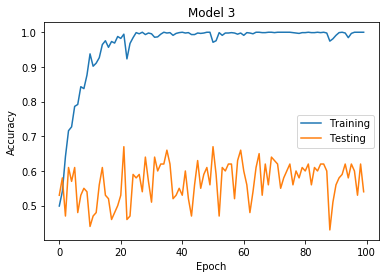

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

model3Hist = history_cb2
plt.plot(model3Hist.acc)
plt.plot(model3Hist.val_acc)
plt.title('Model 3')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [20]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,230,230)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 230, 230, 3)
(100, 230, 230, 3)
(898, 1)
(100, 1)
(230, 230, 3)


In [24]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M4 = Sequential()

M4.add(Conv2D(64, kernel_size=(3, 3),strides=(1,1),activation='relu',input_shape=input_shape))
M4.add(Conv2D(128, (2, 2), activation='relu'))

M4.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M4.add(BatchNormalization())

M4.add(Dropout(.420))

M4.add(Conv2D(64, (1, 1), activation='relu'))
M4.add(Conv2D(64, (2, 2), activation='relu'))

M4.add(MaxPooling2D(pool_size=(4, 4)))

M4.add(Dropout(.420))

M4.add(BatchNormalization())

M4.add(Conv2D(64, (3, 3), activation='relu'))
M4.add(Conv2D(128, (2, 2), activation='relu'))

M4.add(MaxPooling2D(pool_size=(3, 3)))

M4.add(BatchNormalization())

M4.add(Dropout(.420))

M4.add(Flatten())

M4.add(Dense(1600,activation='relu'))

M4.add(BatchNormalization())

M4.add(Dense(720,activation='relu'))

M4.add(BatchNormalization())

M4.add(Dense(1, activation='sigmoid'))

M4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 228, 228, 64)      1792      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 227, 227, 128)     32896     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 113, 113, 128)     0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 113, 113, 128)     512       
_________________________________________________________________
dropout_20 (Dropout)         (None, 113, 113, 128)     0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 113, 113, 64)      8256      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 112, 112, 64)      16448     
__________

In [25]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb3 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M4.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

M4.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb3])

score = M4.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 11s 13ms/step - loss: 1.2773 - acc: 0.5022 - val_loss: 3.3536 - val_acc: 0.5200
Epoch 2/100
898/898 [==============================] - 7s 8ms/step - loss: 0.8585 - acc: 0.5635 - val_loss: 0.7953 - val_acc: 0.4700
Epoch 3/100
898/898 [==============================] - 7s 8ms/step - loss: 0.6746 - acc: 0.5980 - val_loss: 1.5440 - val_acc: 0.4800
Epoch 4/100
898/898 [==============================] - 8s 8ms/step - loss: 0.6087 - acc: 0.6826 - val_loss: 0.8516 - val_acc: 0.5200
Epoch 5/100
898/898 [==============================] - 7s 8ms/step - loss: 0.5980 - acc: 0.6771 - val_loss: 0.8609 - val_acc: 0.4900
Epoch 6/100
898/898 [==============================] - 7s 8ms/step - loss: 0.5617 - acc: 0.7127 - val_loss: 0.8310 - val_acc: 0.5100
Epoch 7/100
898/898 [==============================] - 7s 8ms/step - loss: 0.5525 - acc: 0.7383 - val_loss: 0.7872 - val_acc: 0.4900
Epoch 8/100
898/898 [

Epoch 62/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1460 - acc: 0.9510 - val_loss: 1.2599 - val_acc: 0.5700
Epoch 63/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1317 - acc: 0.9543 - val_loss: 1.5266 - val_acc: 0.5100
Epoch 64/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1413 - acc: 0.9488 - val_loss: 1.4960 - val_acc: 0.5300
Epoch 65/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1280 - acc: 0.9599 - val_loss: 1.2475 - val_acc: 0.6100
Epoch 66/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1168 - acc: 0.9621 - val_loss: 1.4248 - val_acc: 0.5400
Epoch 67/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1167 - acc: 0.9644 - val_loss: 1.2205 - val_acc: 0.4600
Epoch 68/100
898/898 [==============================] - 7s 8ms/step - loss: 0.1319 - acc: 0.9488 - val_loss: 1.7110 - val_acc: 0.4500
Epoch 69/100
898/898 [==============================] - 7s 8ms

In [26]:
M4.save('Skynet_M4')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

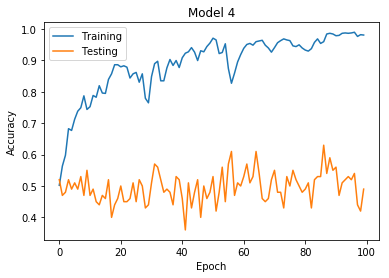

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

model4Hist = history_cb3
plt.plot(model4Hist.acc)
plt.plot(model4Hist.val_acc)
plt.title('Model 4')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [9]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,230,230)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 230, 230, 3)
(100, 230, 230, 3)
(898, 1)
(100, 1)
(230, 230, 3)


In [10]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M5 = Sequential()

M5.add(Conv2D(32, kernel_size=(2, 2),strides=(1,1),activation='relu',input_shape=input_shape))

M5.add(BatchNormalization())

M5.add(Conv2D(32, (2, 2),strides=(2, 2), activation='relu'))

M5.add(BatchNormalization())

M5.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M5.add(Dropout(.2))

M5.add(Conv2D(64, (3, 3), activation='relu'))

M5.add(BatchNormalization())

M5.add(Conv2D(64, (3, 3), activation='relu'))

M5.add(BatchNormalization())

M5.add(MaxPooling2D(pool_size=(2, 2)))

M5.add(Dropout(.2))

M5.add(Conv2D(64, (4, 4), activation='relu'))

M5.add(BatchNormalization())

M5.add(Conv2D(64, (4, 4), activation='relu'))

M5.add(BatchNormalization())

M5.add(MaxPooling2D(pool_size=(2, 2)))

M5.add(BatchNormalization())

M5.add(Dropout(.2))

M5.add(Flatten())

M5.add(Dense(1600,activation='relu'))
M5.add(Dense(800,activation='relu'))
M5.add(BatchNormalization())
M5.add(Dense(400,activation='relu'))
M5.add(Dense(210,activation='relu'))

M5.add(BatchNormalization())

M5.add(Dense(1, activation='sigmoid'))

M5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 228, 228, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 228, 228, 32)      128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 114, 114, 32)      4128      
_________________________________________________________________
batch_normalization_12 (Batc (None, 114, 114, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 56, 56, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
__________

In [12]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb5 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M5.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

M5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb5])

score = M5.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 9s 10ms/step - loss: 0.6987 - acc: 0.5089 - val_loss: 0.7150 - val_acc: 0.4900
Epoch 2/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7091 - acc: 0.4800 - val_loss: 0.6981 - val_acc: 0.5300
Epoch 3/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7031 - acc: 0.5111 - val_loss: 0.6971 - val_acc: 0.4500
Epoch 4/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6922 - acc: 0.5278 - val_loss: 0.6989 - val_acc: 0.4800
Epoch 5/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6926 - acc: 0.5334 - val_loss: 0.7094 - val_acc: 0.5100
Epoch 6/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6881 - acc: 0.5512 - val_loss: 0.7066 - val_acc: 0.5200
Epoch 7/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6777 - acc: 0.5690 - val_loss: 0.7063 - val_acc: 0.4500
Epoch 8/100
898/898 [=

Epoch 62/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0916 - acc: 0.9866 - val_loss: 0.9964 - val_acc: 0.6200
Epoch 63/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0828 - acc: 0.9944 - val_loss: 1.3868 - val_acc: 0.5700
Epoch 64/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0965 - acc: 0.9744 - val_loss: 1.4731 - val_acc: 0.5900
Epoch 65/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0986 - acc: 0.9777 - val_loss: 1.5002 - val_acc: 0.5600
Epoch 66/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0575 - acc: 0.9833 - val_loss: 1.5246 - val_acc: 0.5400
Epoch 67/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0470 - acc: 0.9911 - val_loss: 1.3605 - val_acc: 0.5300
Epoch 68/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0736 - acc: 0.9833 - val_loss: 1.1720 - val_acc: 0.5500
Epoch 69/100
898/898 [==============================] - 5s 5ms

NameError: name 'M4' is not defined

In [13]:
score = M5.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Test loss: 1.6836736679077149
Test accuracy: 0.51
[1.6836736679077149, 0.51]


In [14]:
M5.save('Skynet_M5')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

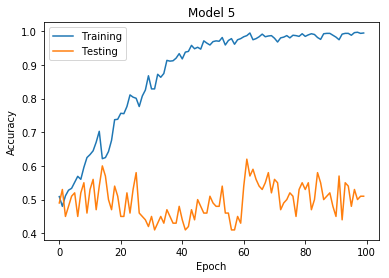

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

model55Hist = history_cb5
plt.plot(model55Hist.acc)
plt.plot(model55Hist.val_acc)
plt.title('Model 5')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [5]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,230,230)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 230, 230, 3)
(100, 230, 230, 3)
(898, 1)
(100, 1)
(230, 230, 3)


In [7]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


#COMPARING OUR DATA WITH THE TA MODEL

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 228, 228, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 228, 228, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 54, 54, 64)        36928     
__________

In [8]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb4 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb4])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

#COMPARING OUR DATA WITH THE TA MODEL

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 11s 13ms/step - loss: 3.9335 - acc: 0.5045 - val_loss: 8.7939 - val_acc: 0.4500
Epoch 2/100
898/898 [==============================] - 5s 5ms/step - loss: 2.4727 - acc: 0.5668 - val_loss: 6.6893 - val_acc: 0.5000
Epoch 3/100
898/898 [==============================] - 5s 5ms/step - loss: 2.1040 - acc: 0.5501 - val_loss: 5.1177 - val_acc: 0.5400
Epoch 4/100
898/898 [==============================] - 5s 5ms/step - loss: 1.0030 - acc: 0.5702 - val_loss: 2.3634 - val_acc: 0.5600
Epoch 5/100
898/898 [==============================] - 5s 5ms/step - loss: 0.8711 - acc: 0.5557 - val_loss: 0.8117 - val_acc: 0.5000
Epoch 6/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7219 - acc: 0.5924 - val_loss: 0.7185 - val_acc: 0.5000
Epoch 7/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7145 - acc: 0.6091 - val_loss: 0.7237 - val_acc: 0.5400
Epoch 8/100
898/898 [

Epoch 62/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0836 - acc: 0.9677 - val_loss: 1.9987 - val_acc: 0.5700
Epoch 63/100
898/898 [==============================] - 5s 5ms/step - loss: 0.1740 - acc: 0.9388 - val_loss: 4.5611 - val_acc: 0.4200
Epoch 64/100
898/898 [==============================] - 5s 5ms/step - loss: 0.3597 - acc: 0.8508 - val_loss: 2.3199 - val_acc: 0.5400
Epoch 65/100
898/898 [==============================] - 5s 5ms/step - loss: 0.2402 - acc: 0.9143 - val_loss: 1.3703 - val_acc: 0.5900
Epoch 66/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0845 - acc: 0.9733 - val_loss: 1.9728 - val_acc: 0.6000
Epoch 67/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0294 - acc: 0.9955 - val_loss: 1.9684 - val_acc: 0.6100
Epoch 68/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0239 - acc: 0.9922 - val_loss: 3.1982 - val_acc: 0.5900
Epoch 69/100
898/898 [==============================] - 5s 5ms

In [16]:
model.save('model')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

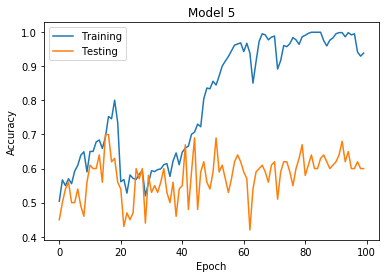

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL
#COMPARING OUR DATA WITH THE TA MODEL

model5Hist = history_cb4
plt.plot(model5Hist.acc)
plt.plot(model5Hist.val_acc)
plt.title('Model 5')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [18]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M6 = Sequential()

M6.add(Conv2D(32, kernel_size=(2, 2),strides=(1,1),activation='relu',input_shape=input_shape))

M6.add(BatchNormalization())

M6.add(Conv2D(32, (2, 2),strides=(2, 2), activation='relu'))

M6.add(BatchNormalization())

M6.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M6.add(Dropout(.2))

M6.add(Conv2D(64, (3, 3), activation='relu'))

M6.add(BatchNormalization())

M6.add(Conv2D(64, (3, 3), activation='relu'))

M6.add(BatchNormalization())

M6.add(MaxPooling2D(pool_size=(2, 2)))

M6.add(Dropout(.2))

M6.add(Conv2D(64, (4, 4), activation='relu'))

M6.add(BatchNormalization())

M6.add(Conv2D(64, (4, 4), activation='relu'))

M6.add(BatchNormalization())

M6.add(MaxPooling2D(pool_size=(2, 2)))

M6.add(BatchNormalization())

M6.add(Dropout(.2))

M6.add(Flatten())

M6.add(Dense(1600,activation='relu'))
M6.add(Dense(800,activation='relu'))
M6.add(BatchNormalization())
M6.add(Dense(400,activation='relu'))
M6.add(Dense(210,activation='relu'))

M6.add(BatchNormalization())

M6.add(Dense(1, activation='sigmoid'))

M6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 229, 229, 32)      416       
_________________________________________________________________
batch_normalization_22 (Batc (None, 229, 229, 32)      128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      4128      
_________________________________________________________________
batch_normalization_23 (Batc (None, 114, 114, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 54, 54, 64)        18496     
__________

In [19]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb6 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M6.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

M6.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb6])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 9s 10ms/step - loss: 0.9089 - acc: 0.5134 - val_loss: 8.5426 - val_acc: 0.4700
Epoch 2/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7711 - acc: 0.5011 - val_loss: 2.9180 - val_acc: 0.4600
Epoch 3/100
898/898 [==============================] - 5s 5ms/step - loss: 0.7263 - acc: 0.4989 - val_loss: 2.6402 - val_acc: 0.4600
Epoch 4/100
898/898 [==============================] - 5s 6ms/step - loss: 0.7741 - acc: 0.5167 - val_loss: 0.7699 - val_acc: 0.5000
Epoch 5/100
898/898 [==============================] - 5s 6ms/step - loss: 0.7089 - acc: 0.5267 - val_loss: 0.7221 - val_acc: 0.4900
Epoch 6/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6948 - acc: 0.5334 - val_loss: 0.7249 - val_acc: 0.5100
Epoch 7/100
898/898 [==============================] - 5s 5ms/step - loss: 0.6934 - acc: 0.5256 - val_loss: 0.7928 - val_acc: 0.4900
Epoch 8/100
898/898 [=

Epoch 62/100
898/898 [==============================] - 4s 5ms/step - loss: 0.0629 - acc: 0.9922 - val_loss: 1.8952 - val_acc: 0.5000
Epoch 63/100
898/898 [==============================] - 5s 6ms/step - loss: 0.0374 - acc: 0.9911 - val_loss: 2.3341 - val_acc: 0.4300
Epoch 64/100
898/898 [==============================] - 6s 6ms/step - loss: 0.0435 - acc: 0.9911 - val_loss: 2.2612 - val_acc: 0.4200
Epoch 65/100
898/898 [==============================] - 4s 5ms/step - loss: 0.0590 - acc: 0.9811 - val_loss: 1.7564 - val_acc: 0.4800
Epoch 66/100
898/898 [==============================] - 4s 5ms/step - loss: 0.0504 - acc: 0.9889 - val_loss: 1.8062 - val_acc: 0.5000
Epoch 67/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0456 - acc: 0.9955 - val_loss: 1.6316 - val_acc: 0.5000
Epoch 68/100
898/898 [==============================] - 5s 5ms/step - loss: 0.0567 - acc: 0.9878 - val_loss: 1.7928 - val_acc: 0.5000
Epoch 69/100
898/898 [==============================] - 5s 5ms

In [20]:
M6.save('Skynet_M6')
# model = keras.models.load_model('')

Text(0, 0.5, 'Accuracy')

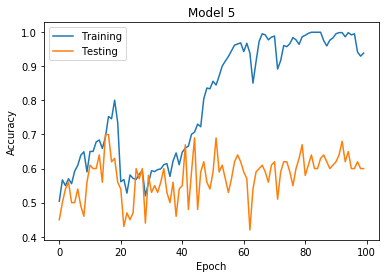

In [21]:
M6.save('Skynet_M6')
# model = keras.models.load_model('')

import matplotlib.pyplot as plt
%matplotlib inline

model5Hist = history_cb4
plt.plot(model5Hist.acc)
plt.plot(model5Hist.val_acc)
plt.title('Model 5')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [14]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,24,24)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 24, 24, 3)
(100, 24, 24, 3)
(898, 1)
(100, 1)
(24, 24, 3)


In [15]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

M7 = Sequential()
M7.add(Dense(1200, input_shape=input_shape, activation='sigmoid'))
M7.add(Dense(600, activation='sigmoid', name='hidden'))
M7.add(Flatten())
M7.add(Dense(1, activation='sigmoid', name='output'))

In [16]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb7 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M7.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

M7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb7])

score = M7.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0345 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/100
898/898 [==============================] - 1s 815us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/100
898/898 [==============================] - 1s 821us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/100
898/898 [==============================] - 1s 818us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/100
898/898 [==============================] - 1s 832us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/100
898/898 [==============================] - 1s 800us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/100
898/898 [==============================] - 1s 849us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
E

NameError: name 'model' is not defined

In [17]:
score = M7.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Test loss: nan
Test accuracy: 0.0
[nan, 0.0]


Text(0, 0.5, 'Accuracy')

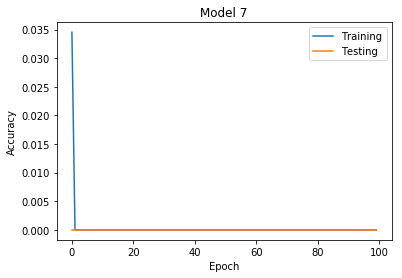

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

M7.save('Skynet_M7')
# model = keras.models.load_model('')

model7Hist = history_cb7
plt.plot(model7Hist.acc)
plt.plot(model7Hist.val_acc)
plt.title('Model 7')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [29]:
from sklearn.model_selection import train_test_split

input_shape,x=loadpath(image_paths_train+image_paths_test,200,200)
y=np.concatenate((y_train, y_test), axis=0)
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# y_train=y_train.transpose()
# y_test=y_test.transpose()

# y_train=np.matrix(y_train)
# y_test=np.matrix(y_test)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=420,shuffle=True)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(input_shape)

(898, 200, 200, 3)
(100, 200, 200, 3)
(898, 1)
(100, 1)
(200, 200, 3)


In [15]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M8 = Sequential()

M8.add(Conv2D(32, kernel_size=(2, 2),strides=(1,1),activation='relu',input_shape=input_shape))

M8.add(BatchNormalization())

M8.add(Conv2D(32, (2, 2),strides=(2, 2), activation='relu'))

M8.add(BatchNormalization())

M8.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M8.add(Dropout(.2))

M8.add(Conv2D(64, (3, 3), activation='relu'))

M8.add(BatchNormalization())

M8.add(Conv2D(64, (3, 3), activation='relu'))

M8.add(BatchNormalization())

M8.add(MaxPooling2D(pool_size=(2, 2)))

M8.add(Dropout(.2))

M8.add(Conv2D(64, (4, 4), activation='relu'))

M8.add(BatchNormalization())

M8.add(Conv2D(64, (4, 4), activation='relu'))

M8.add(BatchNormalization())

M8.add(MaxPooling2D(pool_size=(2, 2)))

M8.add(BatchNormalization())

M8.add(Dropout(.2))

M8.add(Flatten())

M8.add(Dense(1600,activation='sigmoid'))
M8.add(Dense(800,activation='sigmoid'))
M8.add(BatchNormalization())
M8.add(Dense(400,activation='sigmoid'))
M8.add(Dense(210,activation='sigmoid'))

M8.add(BatchNormalization())

M8.add(Dense(1, activation='sigmoid'))

M8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 199, 199, 32)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 199, 199, 32)      128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 99, 99, 32)        4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 99, 99, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        18496     
__________

In [33]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb6 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M8.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

M8.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb6])

score = M8.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 8s 9ms/step - loss: 1.8668 - acc: 0.5145 - val_loss: 0.7714 - val_acc: 0.5700
Epoch 2/100
898/898 [==============================] - 4s 4ms/step - loss: 0.8293 - acc: 0.4955 - val_loss: 0.6948 - val_acc: 0.5400
Epoch 3/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7312 - acc: 0.5200 - val_loss: 0.7025 - val_acc: 0.4700
Epoch 4/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6965 - acc: 0.5434 - val_loss: 0.7071 - val_acc: 0.4600
Epoch 5/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7097 - acc: 0.4800 - val_loss: 0.6892 - val_acc: 0.5500
Epoch 6/100
898/898 [==============================] - 4s 5ms/step - loss: 0.7137 - acc: 0.4989 - val_loss: 0.7987 - val_acc: 0.4400
Epoch 7/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7346 - acc: 0.5189 - val_loss: 0.7566 - val_acc: 0.5200
Epoch 8/100
898/898 [==

Epoch 62/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6686 - acc: 0.5768 - val_loss: 0.7668 - val_acc: 0.4400
Epoch 63/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6507 - acc: 0.6136 - val_loss: 0.7597 - val_acc: 0.5400
Epoch 64/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6643 - acc: 0.5780 - val_loss: 0.8971 - val_acc: 0.5300
Epoch 65/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6603 - acc: 0.5935 - val_loss: 0.7923 - val_acc: 0.5500
Epoch 66/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6732 - acc: 0.5612 - val_loss: 0.7770 - val_acc: 0.5200
Epoch 67/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6740 - acc: 0.5824 - val_loss: 0.8086 - val_acc: 0.5200
Epoch 68/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6794 - acc: 0.5390 - val_loss: 0.8367 - val_acc: 0.4600
Epoch 69/100
898/898 [==============================] - 4s 4ms

Text(0, 0.5, 'Accuracy')

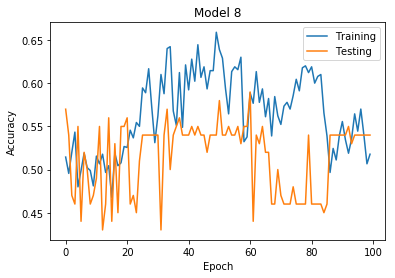

In [34]:
M8.save('Skynet_M8')
# model = keras.models.load_model('')

import matplotlib.pyplot as plt
%matplotlib inline

model8Hist = history_cb6
plt.plot(model8Hist.acc)
plt.plot(model8Hist.val_acc)
plt.title('Model 8')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [35]:
from keras import Model,Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
# Basic model1

M9 = Sequential()

M9.add(Conv2D(32, kernel_size=(2, 2),strides=(1,1),activation='relu',input_shape=input_shape))

M9.add(BatchNormalization())

M9.add(Conv2D(32, (2, 2),strides=(2, 2), activation='relu'))

M9.add(BatchNormalization())

M9.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))

M9.add(Dropout(.2))

M9.add(Flatten())

M9.add(Dense(1600,activation='sigmoid'))

M9.add(BatchNormalization())

M9.add(Dense(1, activation='sigmoid'))

M9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 199, 199, 32)      416       
_________________________________________________________________
batch_normalization_41 (Batc (None, 199, 199, 32)      128       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 99, 99, 32)        4128      
_________________________________________________________________
batch_normalization_42 (Batc (None, 99, 99, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 76832)             0         
__________

In [36]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb6 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M9.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['accuracy'])

M9.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb6])

score = M9.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 11s 13ms/step - loss: 2.1483 - acc: 0.5056 - val_loss: 1.2718 - val_acc: 0.4900
Epoch 2/100
898/898 [==============================] - 4s 4ms/step - loss: 1.1505 - acc: 0.5334 - val_loss: 2.5626 - val_acc: 0.4400
Epoch 3/100
898/898 [==============================] - 4s 4ms/step - loss: 0.8605 - acc: 0.5479 - val_loss: 0.7213 - val_acc: 0.5900
Epoch 4/100
898/898 [==============================] - 4s 4ms/step - loss: 0.8743 - acc: 0.5445 - val_loss: 0.8689 - val_acc: 0.5900
Epoch 5/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7768 - acc: 0.6136 - val_loss: 1.1114 - val_acc: 0.5500
Epoch 6/100
898/898 [==============================] - 4s 4ms/step - loss: 0.8071 - acc: 0.6036 - val_loss: 0.9813 - val_acc: 0.4600
Epoch 7/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7181 - acc: 0.6002 - val_loss: 0.9211 - val_acc: 0.4900
Epoch 8/100
898/898 [

Epoch 62/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7631 - acc: 0.6269 - val_loss: 1.0423 - val_acc: 0.4400
Epoch 63/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6128 - acc: 0.6715 - val_loss: 0.9590 - val_acc: 0.4200
Epoch 64/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6211 - acc: 0.6570 - val_loss: 1.2468 - val_acc: 0.4400
Epoch 65/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6438 - acc: 0.6626 - val_loss: 1.1702 - val_acc: 0.4400
Epoch 66/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6007 - acc: 0.6860 - val_loss: 1.1961 - val_acc: 0.5000
Epoch 67/100
898/898 [==============================] - 4s 4ms/step - loss: 0.6954 - acc: 0.6169 - val_loss: 1.6579 - val_acc: 0.5200
Epoch 68/100
898/898 [==============================] - 4s 4ms/step - loss: 0.7193 - acc: 0.6281 - val_loss: 1.6560 - val_acc: 0.4800
Epoch 69/100
898/898 [==============================] - 4s 4ms

Text(0, 0.5, 'Accuracy')

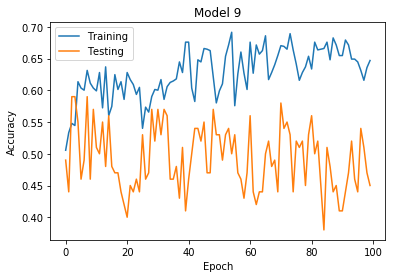

In [39]:
M9.save('Skynet_M9')
# model = keras.models.load_model('')

import matplotlib.pyplot as plt
%matplotlib inline

model9Hist = history_cb6
plt.plot(model9Hist.acc)
plt.plot(model9Hist.val_acc)
plt.title('Model 9')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [16]:
import keras
from keras.utils import multi_gpu_model

# # Replicates `model` on 8 GPUs.
# # This assumes that your machine has 8 available GPUs.
# parallel_model = multi_gpu_model(M3, gpus=3)

history_cb6 = LossHistory()
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

batch_size=64
epochs=100
M8.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['categorical_accuracy'])

M8.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history_cb6])

score = M8.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

Train on 898 samples, validate on 100 samples
Epoch 1/100
898/898 [==============================] - 6s 7ms/step - loss: 2.2715 - categorical_accuracy: 1.0000 - val_loss: 0.6804 - val_categorical_accuracy: 1.0000
Epoch 2/100
898/898 [==============================] - 3s 3ms/step - loss: 0.9228 - categorical_accuracy: 1.0000 - val_loss: 0.8071 - val_categorical_accuracy: 1.0000
Epoch 3/100
898/898 [==============================] - 3s 3ms/step - loss: 0.7641 - categorical_accuracy: 1.0000 - val_loss: 0.6996 - val_categorical_accuracy: 1.0000
Epoch 4/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6984 - categorical_accuracy: 1.0000 - val_loss: 0.6974 - val_categorical_accuracy: 1.0000
Epoch 5/100
898/898 [==============================] - 3s 3ms/step - loss: 0.7080 - categorical_accuracy: 1.0000 - val_loss: 0.7213 - val_categorical_accuracy: 1.0000
Epoch 6/100
898/898 [==============================] - 3s 3ms/step - loss: 0.7257 - categorical_accuracy: 1.0000 - val_

898/898 [==============================] - 3s 3ms/step - loss: 0.6260 - categorical_accuracy: 1.0000 - val_loss: 1.0695 - val_categorical_accuracy: 1.0000
Epoch 50/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6163 - categorical_accuracy: 1.0000 - val_loss: 1.1977 - val_categorical_accuracy: 1.0000
Epoch 51/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6341 - categorical_accuracy: 1.0000 - val_loss: 1.0463 - val_categorical_accuracy: 1.0000
Epoch 52/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6417 - categorical_accuracy: 1.0000 - val_loss: 1.0476 - val_categorical_accuracy: 1.0000
Epoch 53/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6262 - categorical_accuracy: 1.0000 - val_loss: 1.0271 - val_categorical_accuracy: 1.0000
Epoch 54/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6260 - categorical_accuracy: 1.0000 - val_loss: 1.2507 - val_categorical_accuracy: 1.0000
Epoch

Epoch 98/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6044 - categorical_accuracy: 1.0000 - val_loss: 1.6116 - val_categorical_accuracy: 1.0000
Epoch 99/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6262 - categorical_accuracy: 1.0000 - val_loss: 1.1359 - val_categorical_accuracy: 1.0000
Epoch 100/100
898/898 [==============================] - 3s 3ms/step - loss: 0.6057 - categorical_accuracy: 1.0000 - val_loss: 1.1794 - val_categorical_accuracy: 1.0000
Test loss: 1.1793888664245606
Test accuracy: 1.0
[1.1793888664245606, 1.0]


Text(0, 0.5, 'Accuracy')

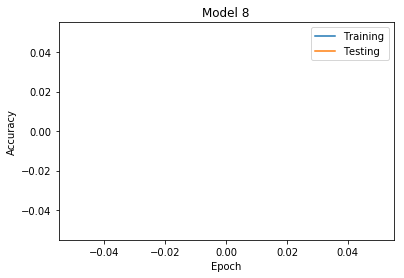

In [17]:
M8.save('Skynet_M8.10')
# model = keras.models.load_model('')

import matplotlib.pyplot as plt
%matplotlib inline

model8Hist = history_cb6
plt.plot(model8Hist.acc)
plt.plot(model8Hist.val_acc)
plt.title('Model 8')
plt.legend(("Training", "Testing"), loc="best")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')